In [32]:
#step 1: import libraries
import numpy as np
import matplotlib.pyplot as plt
import math
#parameters
P=10000
a=0.01 #fixed birth rate
b=0.01 #fixed death rate
p=100
nd=5
pm=mutation_rate=0.001

g = afnd(1- p/Pc)
d = b * math.exp(-nd)
Where g is the birth rate and d is the death rate.
In a nutshell, at each time step, they update the birth rate (g) and the death rate (d), as a function of the initial rates (a and b), and p, Pc, and nd (population size, maximum population size and number of driver mutations, respectively). So in the model you can do the same:
(1) choose an initial a and b,
(2) keep track of the mutations acquired,
(3) and update g and d at each time step.

In [2]:
#step 2
#no of steps
T=1000
#CREATE A VECTOR FOR THE POPULATION SIZE
x=np.zeros((T,5)) #matrix with T number of rows and 5 number of columns
x[0,]=25
x[0:20,]
#CREATE A VECTOR FOR THE NUMBER OF MUTATIONS
y=np.zeros((T,5)) #matrix with T number of rows and 5 number of columns


In [4]:
#loop for simulations when birth rate and death rate are constant



for c in range(4):
  for t in range(T-1):

    ## First, compute the new mutations
    #IF THERE IS MUTATION
    mutation=np.random.rand()<=pm*x[t,c] ## Here pm is the probability of aquiring a mutation, for each cell in your population
    ## Update the number of mutations
    y[t+1,c]=y[t,c]+1*mutation
    #the evolution stops


    g = a
    d = b

    ## Second, update the population size
    if 0<x[t,c]<P-1:
      #IF THERE IS BIRTH
      birth=np.random.rand()<=g*x[t,c]
      #IF THERE IS DEATH
      death=np.random.rand()<=d*x[t,c]
      x[t+1,c]=x[t,c]+1*birth-1*death
      #the evolution stops
    else:
      x[t+1,c]=x[t,c]


In [5]:
x

array([[25., 25., 25., 25., 25.],
       [25., 25., 25., 25.,  0.],
       [25., 25., 25., 26.,  0.],
       ...,
       [29., 61., 21., 51.,  0.],
       [28., 60., 21., 51.,  0.],
       [28., 60., 21., 52.,  0.]])

In [6]:
x[-25:]

array([[29., 61., 23., 54.,  0.],
       [29., 61., 23., 54.,  0.],
       [30., 61., 23., 53.,  0.],
       [30., 61., 23., 53.,  0.],
       [30., 61., 23., 53.,  0.],
       [30., 62., 24., 53.,  0.],
       [30., 62., 23., 52.,  0.],
       [30., 62., 23., 51.,  0.],
       [31., 61., 23., 51.,  0.],
       [31., 60., 23., 51.,  0.],
       [30., 61., 23., 50.,  0.],
       [31., 61., 23., 49.,  0.],
       [30., 61., 23., 50.,  0.],
       [30., 61., 23., 51.,  0.],
       [30., 61., 22., 52.,  0.],
       [30., 62., 22., 53.,  0.],
       [31., 62., 22., 53.,  0.],
       [30., 61., 23., 52.,  0.],
       [29., 61., 22., 51.,  0.],
       [30., 60., 22., 51.,  0.],
       [29., 61., 22., 51.,  0.],
       [28., 61., 22., 50.,  0.],
       [29., 61., 21., 51.,  0.],
       [28., 60., 21., 51.,  0.],
       [28., 60., 21., 52.,  0.]])

In [7]:
y

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       ...,
       [30., 39., 23., 37.,  0.],
       [30., 39., 23., 37.,  0.],
       [30., 39., 23., 37.,  0.]])

In [8]:
x[t]

array([28., 60., 21., 51.,  0.])

Text(0, 0.5, 'CELLS')

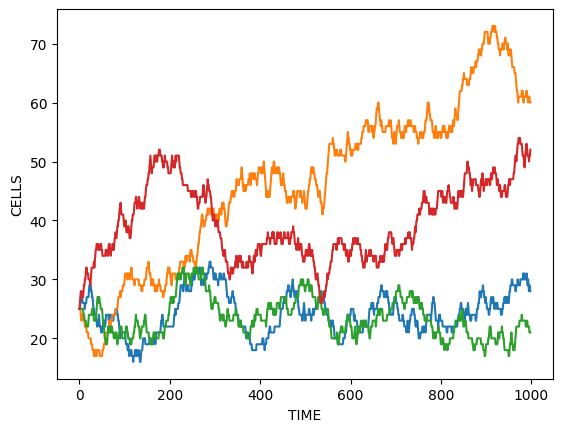

In [9]:
plt.plot(x[1:,0])
plt.plot(x[1:,1])
plt.plot(x[1:,2])
plt.plot(x[1:,3])

plt.xlabel("TIME")
plt.ylabel("CELLS")

In [28]:
import seaborn as sns
import pandas as pd
tracker=np.array([])

In [29]:
plt.figure(figsize=(6,3));

<Figure size 600x300 with 0 Axes>

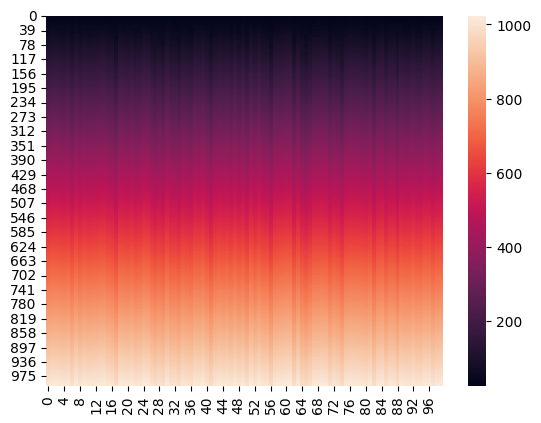

In [33]:
#plt.imshow(x, cmap='hot', interpolation='nearest')


## Transform x in a panda dataframe
df = pd.DataFrame(x)
## Plot heatmap
p1 = sns.heatmap(df)

## This heatmap is ploting, for each column (x axis, each simulation), and at each time (y axis), the number of cells (color scale)

In [13]:
## Do simulations for heatmap

import time
import datetime
import statistics

T=1000
#parameters
P=10000
b=0.01 #initial death rate
event_list=[]
def add_event(event_date_time):
    event_list.append({ "datetime": event_date_time})
mutation_rate = 0.001

## Set of bi to test
n_set_bi = 4
set_bi = [0, 0.001, 0.01, 0.1]

## Set of birth rates
n_set_birth_rates = 4
set_birth_rates = [0, 0.001, 0.01, 0.1]

## Create heatmap matrix to store results
matrix_heatmap = np.zeros((n_set_birth_rates,n_set_bi))
matrix_heatmap2=np.zeros((n_set_birth_rates,n_set_bi))
## Run simulations

for test_bi in range(n_set_bi):
  for test_birth_rate in range(n_set_birth_rates):
    ## Initialize matrices
    ## Cells
    x=np.zeros((T,100))
    x[0,]=25 ## Initially 25 cells
    ## Mutations
    y=np.zeros((T,100))
    time_successful=[]

    ## Specific paramaters of the simulations
    a = set_birth_rates[test_birth_rate]
    bi = set_bi[test_bi]

    count_number_succeful_simulations = 0
    threshold_cancer = 40 #cells

    #loop for simulations
    for c in range(100):
      simulation_successful = 0 ## To keep track if this simulation is successful
      for t in range(T-1):

        ## First, compute the new mutations
        #IF THERE IS MUTATION
        mutation=np.random.rand()<=mutation_rate*x[t,c] ## Here pm or mutation rate is the probability of aquiring a mutation, for each cell in your population
        ## Update the number of mutations
        y[t+1,c]=y[t,c]+1*mutation
        #the evolution stops
      ##keep track of mutations
        if mutation==True:

          add_event(t)
        else:
          pass

        ## Update the growth rate and death rates
        g = a + y[t+1,c] * bi ## Update birth rate
        d = b * math.exp(-y[t+1,c]) ## Update death rate

        ## Second, update the population size
        if 0<x[t,c]<P-1:
          #IF THERE IS BIRTH
          birth=np.random.rand()<=g*x[t,c]
          #IF THERE IS DEATH
          death=np.random.rand()<=d*x[t,c]
          x[t+1,c]=x[t,c]+1*birth-1*death
          #the evolution stops
        else:
          x[t+1,c]=x[t,c]

        if x[t+1,c] > threshold_cancer: ## Check if simulation successful
          ## New condition to append time:
          if simulation_successful == 0:
            time_successful.append(t)
          simulation_successful = 1

      count_number_succeful_simulations = count_number_succeful_simulations + simulation_successful

    matrix_heatmap[test_birth_rate, test_bi] = count_number_succeful_simulations / 100

    if len(time_successful) > 1:
      matrix_heatmap2[test_birth_rate, test_bi]=statistics.mean(time_successful)
    if len(time_successful) == 1:
      matrix_heatmap2[test_birth_rate, test_bi]=time_successful[0]
    if len(time_successful) == 0:
      matrix_heatmap2[test_birth_rate, test_bi]=1000

#-> 1 set of paramters for bi
#-> 1 set of parameters for birth rates

#each time, simulate 100 populations
#for each simulation we want the time at which the simualtion reached the threshold

#For one simulation: time_successful (this is just an element)
#For 100 simualtions: [time_successful_1, time_successful_2, time_successful_3, ..., time_successful_100]

#matrix_heatmap_time[test_birth_rate, test_bi] = mean([time_successful_1, time_successful_2, time_successful_3, ..., time_successful_100])
#matrix_heatmap_time[test_birth_rate, test_bi] = mean([time_successful])




Text(0, 0.5, 'CELLS')

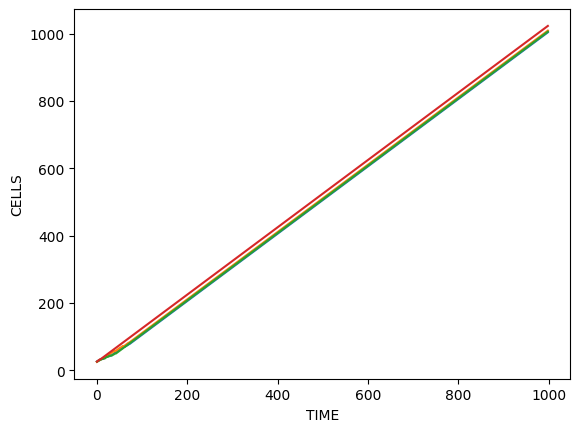

In [14]:
plt.plot(x[1:,0])
plt.plot(x[1:,1])
plt.plot(x[1:,2])
plt.plot(x[1:,3])

plt.xlabel("TIME")
plt.ylabel("CELLS")

Text(0, 0.5, 'CELLS')

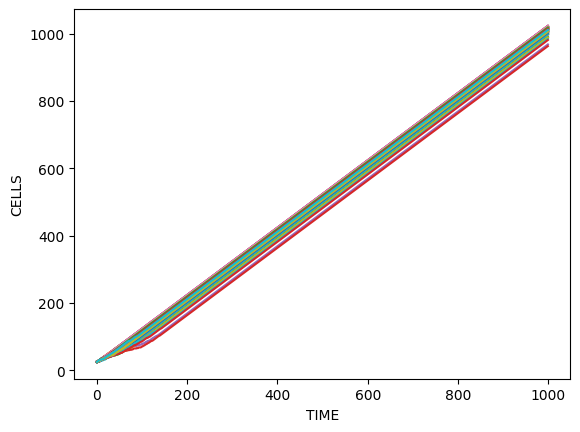

In [15]:
plt.plot(x)

plt.xlabel("TIME")
plt.ylabel("CELLS")

Text(0, 0.5, 'CELLS')

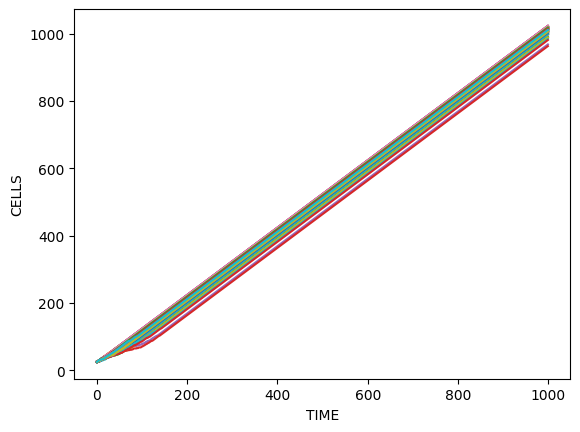

In [16]:
plt.plot(x)

plt.xlabel("TIME")
plt.ylabel("CELLS")

Text(0, 0.5, 'MUTATIONS')

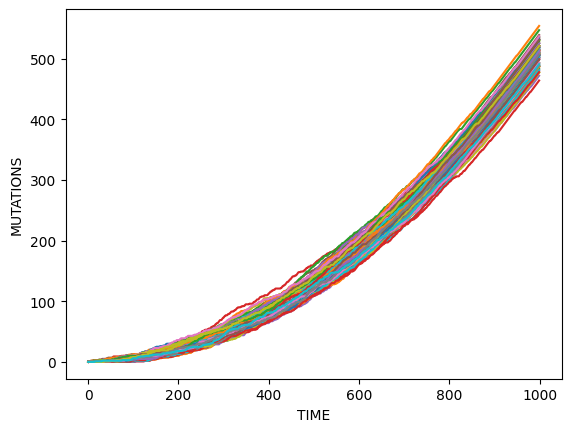

In [17]:
plt.plot(y)

plt.xlabel("TIME")
plt.ylabel("MUTATIONS")

Text(50.722222222222214, 0.5, 'Mutation Rate')

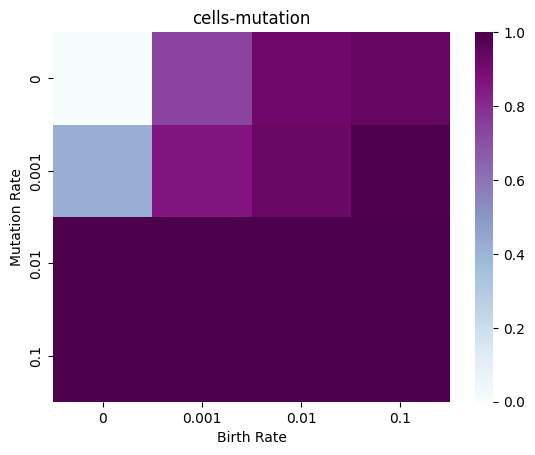

In [18]:
## Plot heatmap

## Transform x in a panda dataframe, and add labels
x_axis_labels = ['0', '0.001', '0.01', '0.1'] # labels for x-axis
y_axis_labels = ['0','0.001', '0.01', '0.1'] # labels for y-axis
df = pd.DataFrame(matrix_heatmap,
                  index = y_axis_labels,
                  columns = x_axis_labels)
## Plot heatmap
plt.title('cells-mutation')
p1 = sns.heatmap(df, cmap="BuPu")
plt.xlabel('Birth Rate')
plt.ylabel('Mutation Rate')

# create seabvorn heatmap with required labels

# labels for the axis,

Text(50.722222222222214, 0.5, 'mutation rate')

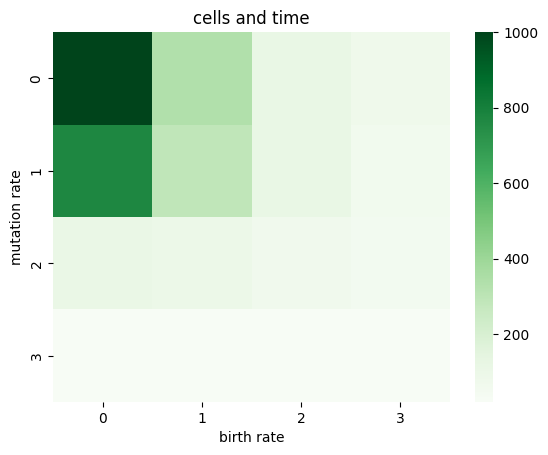

In [19]:
df3=pd.DataFrame(matrix_heatmap2)
plt.title("cells and time")
p3=sns.heatmap(df3,cmap="Greens")
plt.xlabel("birth rate")
plt.ylabel("mutation rate")

Text(50.722222222222214, 0.5, 'mutation rate')

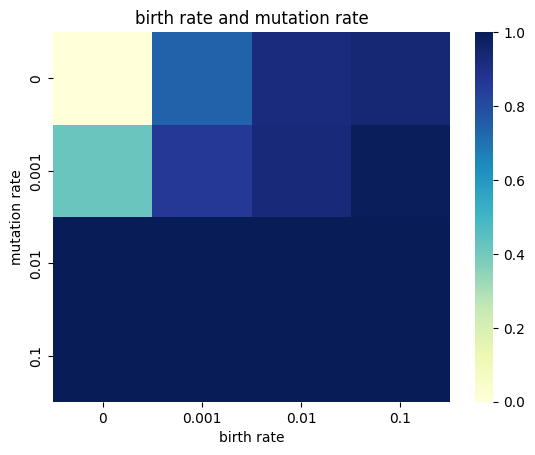

In [20]:
## Change color
p1 = sns.heatmap(df, cmap="YlGnBu")
plt.title("birth rate and mutation rate")
plt.xlabel("birth rate")
plt.ylabel("mutation rate")

**FOR DEATH AND MUTATION HEATMAP**

In [21]:
## heatmaps
## Do simulations for heatmap death rate


#parameters
P=10000

b=0.01 #initial birth rate

T=1000
#population size (doubt) what is the difference between maximum population size and population size??
mutation_rate = pm= 0.001

## Set of bi to test
n_set_bi = 5
set_bi = [0, 0.001, 0.01, 0.1,1]

## Set of birth rates
n_set_death_rates = 5
set_death_rates = [0, 0.005, 0.01, 0.05, 0.1]

## Create heatmap matrix to store results
matrix_heatmap1 = np.zeros((n_set_death_rates,n_set_bi))

## Run simulations

for test_bi in range(n_set_bi):
  for test_death_rate in range(n_set_death_rates):
    ## Initialize matrices
    ## Cells
    x1=np.zeros((T,100))
    x1[0,]=25 ## Initially 25 cells
    ## Mutations
    y1=np.zeros((T,100))

    ## Specific paramaters of the simulations
    a1 = set_death_rates[test_death_rate]
    bi = set_bi[test_bi]

    count_number_succeful_simulations1 = 0
    threshold_cancer = 40 #cells

    #loop for simulations
    for c in range(100):
      simulation_successful1 = 0 ## To keep track if this simulation is successful
      for t in range(T-1):

        ## First, compute the new mutations
        #IF THERE IS MUTATION
        mutation=np.random.rand()<=mutation_rate*x1[t,c] ## Here pm is the probability of aquiring a mutation, for each cell in your population
        ## Update the number of mutations
        y1[t+1,c]=y1[t,c]+1*mutation
        #the evolution stops

        ## Update the growth rate and death rates
        g = b + y1[t+1,c] * bi ## Update birth rate
        d = a1 * math.exp(-y1[t+1,c]) ## Update death rate

        ## Second, update the population size
        if 0<x1[t,c]<P-1:
          #IF THERE IS BIRTH
          birth=np.random.rand()<=g*x1[t,c]
          #IF THERE IS DEATH
          death=np.random.rand()<=d*x1[t,c]
          x1[t+1,c]=x1[t,c]+1*birth-1*death
          #the evolution stops
        else:
          x1[t+1,c]=x1[t,c]


        if x1[t+1,c] > threshold_cancer: ## Check if simulation successful
          simulation_successful1 = 1


      count_number_succeful_simulations1 = count_number_succeful_simulations1 + simulation_successful1

    matrix_heatmap1[test_death_rate, test_bi] = count_number_succeful_simulations1 / 100

In [22]:
y1

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0., 432., ...,   0.,   0.,   0.],
       [  0.,   0., 433., ...,   0.,   0.,   0.],
       [  0.,   0., 434., ...,   0.,   0.,   0.]])

In [23]:
df1=pd.DataFrame(matrix_heatmap1)

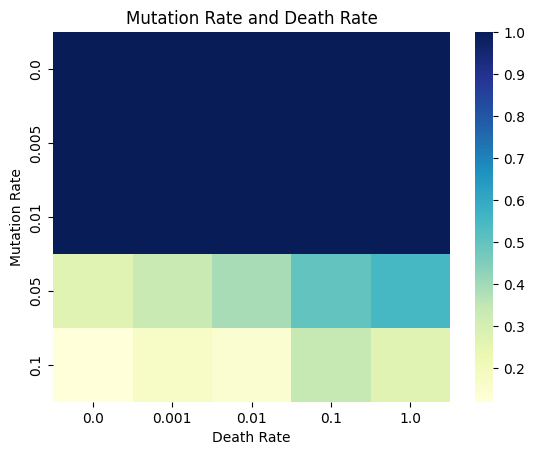

In [25]:
x_axis_labels = [0, 0.001, 0.01, 0.1, 1]  # Labels for x-axis
y_axis_labels = [0, 0.005, 0.01, 0.05, 0.1]  # Labels for y-axis

df1 = pd.DataFrame(matrix_heatmap1, index=y_axis_labels, columns=x_axis_labels)

# Create the heatmap
p2 = sns.heatmap(df1, cmap="YlGnBu")

# Set labels and title
plt.title("Mutation Rate and Death Rate")
plt.xlabel("Death Rate")
plt.ylabel("Mutation Rate")

# Show the plot
plt.show()






In [26]:
## Do simulations for heatmap


T=1000
#parameters
P=10000
b=0.01 #initial death rate
event_list=[]
def add_event(event_date_time):
    event_list.append({ "datetime": event_date_time})
mutation_rate = 0.001

## Set of bi to test
n_set_bi = 5
set_bi = [0, 0.001, 0.01, 0.1,0.2]


## Set of birth rates
n_set_death_rates = 5
set_death_rates = [0, 0.001, 0.01, 0.1,0.2]

## Create heatmap matrix to store results
matrix_heatmap4 = np.zeros((n_set_death_rates,n_set_bi))
matrix_heatmap3=np.zeros((n_set_death_rates,n_set_bi))
## Run simulations

for test_bi in range(n_set_bi):
  for test_death_rate in range(n_set_death_rates):
    ## Initialize matrices
    ## Cells
    x=np.zeros((T,100))
    x[0,]=25 ## Initially 25 cells
    ## Mutations
    y=np.zeros((T,100))
    time_successful=[]

    ## Specific paramaters of the simulations
    a = set_death_rates[test_death_rate]
    bi = set_bi[test_bi]

    count_number_succeful_simulations = 0
    threshold_cancer = 40 # threshold number of cells

    #loop for simulations
    for c in range(100):
      simulation_successful = 0 ## To keep track if this simulation is successful
      for t in range(T-1):

        ## First, compute the new mutations
        #IF THERE IS MUTATION
        mutation=np.random.rand()<=mutation_rate*x[t,c] ## Here pm or mutation rate is the probability of aquiring a mutation, for each cell in your population
        ## Update the number of mutations
        y[t+1,c]=y[t,c]+1*mutation
        #the evolution stops
      ##keep track of mutations
        if mutation==True:

          add_event(t)
        else:
          pass

        ## Update the growth rate and death rates
        g = a + y[t+1,c] * bi ## Update birth rate
        d = b * math.exp(-y[t+1,c]) ## Update death rate

        ## Second, update the population size
        if 0<x[t,c]<P-1:
          #IF THERE IS BIRTH
          birth=np.random.rand()<=g*x[t,c]
          #IF THERE IS DEATH
          death=np.random.rand()<=d*x[t,c]
          x[t+1,c]=x[t,c]+1*birth-1*death
          #the evolution stops
        else:
          x[t+1,c]=x[t,c]

        if x[t+1,c] > threshold_cancer: ## Check if simulation successful
          ## New condition to append time:
          if simulation_successful == 0:
            time_successful.append(t)
          simulation_successful = 1

      count_number_succeful_simulations = count_number_succeful_simulations + simulation_successful

    matrix_heatmap3[test_death_rate, test_bi] = count_number_succeful_simulations / 100

    if len(time_successful) > 1:
      matrix_heatmap3[test_death_rate, test_bi]=statistics.mean(time_successful)
    if len(time_successful) == 1:
      matrix_heatmap3[test_death_rate, test_bi]=time_successful[0]
    if len(time_successful) == 0:
      matrix_heatmap3[test_death_rate, test_bi]=1000


Text(50.722222222222214, 0.5, 'mutation rate')

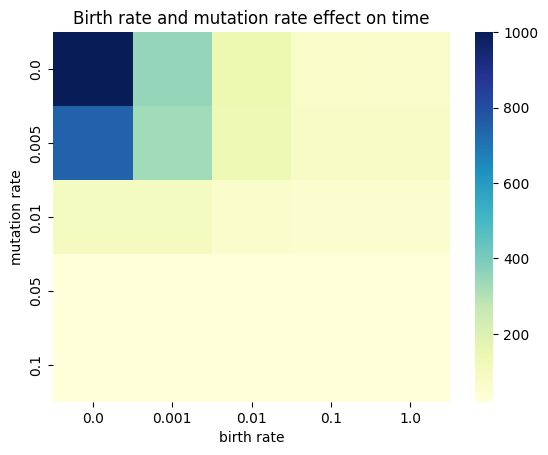

In [27]:
x_axis_labels1 = [0, 0.001, 0.01, 0.1, 1]  # labels for x-axis
y_axis_labels1 = [0, 0.005, 0.01, 0.05, 0.1]  # labels for y-axis

# Create a DataFrame with custom labels
df4 = pd.DataFrame(matrix_heatmap3, index=y_axis_labels1, columns=x_axis_labels1)

# Create the heatmap using Seaborn
p3 = sns.heatmap(df4, cmap="YlGnBu")
plt.title("Birth rate and mutation rate effect on time")
plt.xlabel("birth rate")
plt.ylabel("mutation rate")